<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-10/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pytesseract

In [5]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image


## Nomor 3 :Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), denganthreshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di bawah.


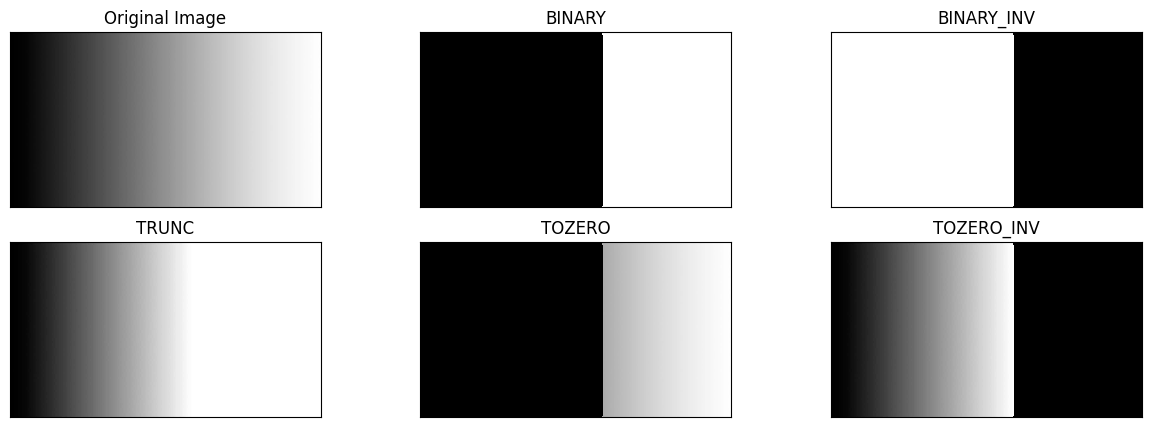

In [8]:
filename = '/content/drive/MyDrive/pcvk-resources/gradient.jpg'
img = cv2.imread(filename, 0)  # Load the image as grayscale

# Nilai Threshold yang ditentukan
thresh = 170

# Buat citra binary secara manual
thresh1 = np.zeros_like(img)
thresh1[img > thresh] = 255

# Buat citra binary inverse secara manual
thresh2 = np.zeros_like(img)
thresh2[img <= thresh] = 255

# Buat citra Threshold Truncate secara manual
thresh3 = img.copy()
thresh3[thresh3 > thresh] = thresh

# Buat citra Threshold Tozero secara manual
thresh4 = img.copy()
thresh4[thresh4 <= thresh] = 0

# Buat citra Threshold Tozero Inverse secara manual
thresh5 = img.copy()
thresh5[thresh5 > thresh] = 0

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Nomor 4: Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai thresholdsaat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan imagektp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

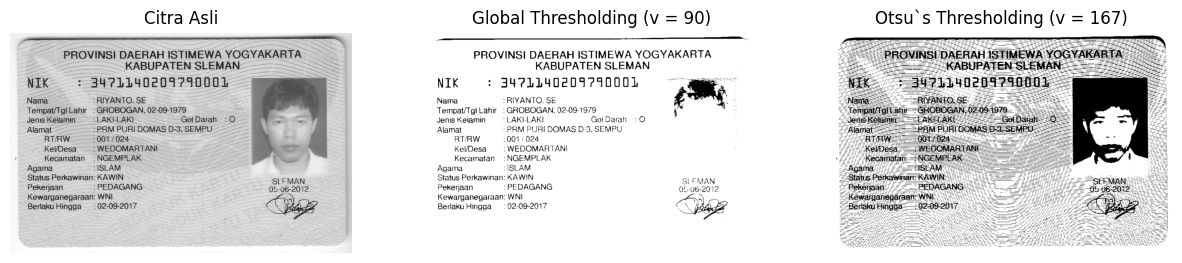

In [40]:
filename = '/content/drive/MyDrive/pcvk-resources/ktp Riyanto.png'
# Load the image in grayscale
image = cv2.imread(filename, 0)

# Compute histogram and probabilities of each intensity level
histogram = np.histogram(image, bins=256, range=(0, 256), density=True)[0]
total_pixels = image.shape[0] * image.shape[1]
probabilities = histogram / total_pixels

# Initialize variables
maximum_variance = 0
optimal_threshold = 0

# Iterate over all possible threshold values
for t in range(256):
    # Calculate weights and means
    w0 = np.sum(probabilities[:t])
    w1 = np.sum(probabilities[t:])
    mean0 = np.sum(np.arange(t) * probabilities[:t]) / w0 if w0 > 0 else 0
    mean1 = np.sum(np.arange(t, 256) * probabilities[t:]) / w1 if w1 > 0 else 0

    # Calculate between-class variance
    variance = w0 * w1 * (mean0 - mean1) ** 2

    # Update maximum variance and optimal threshold
    if variance > maximum_variance:
        maximum_variance = variance
        optimal_threshold = t

# Apply thresholding
thresholded_image = (image > 90) * 255
optimal_thresholded_image = (image > optimal_threshold) * 255

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Global Thresholding (v = 90)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(optimal_thresholded_image, cmap='gray')
plt.title(f'Otsu`s Thresholding (v = {optimal_threshold})')
plt.axis('off')

plt.show()

## Nomor 5 Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

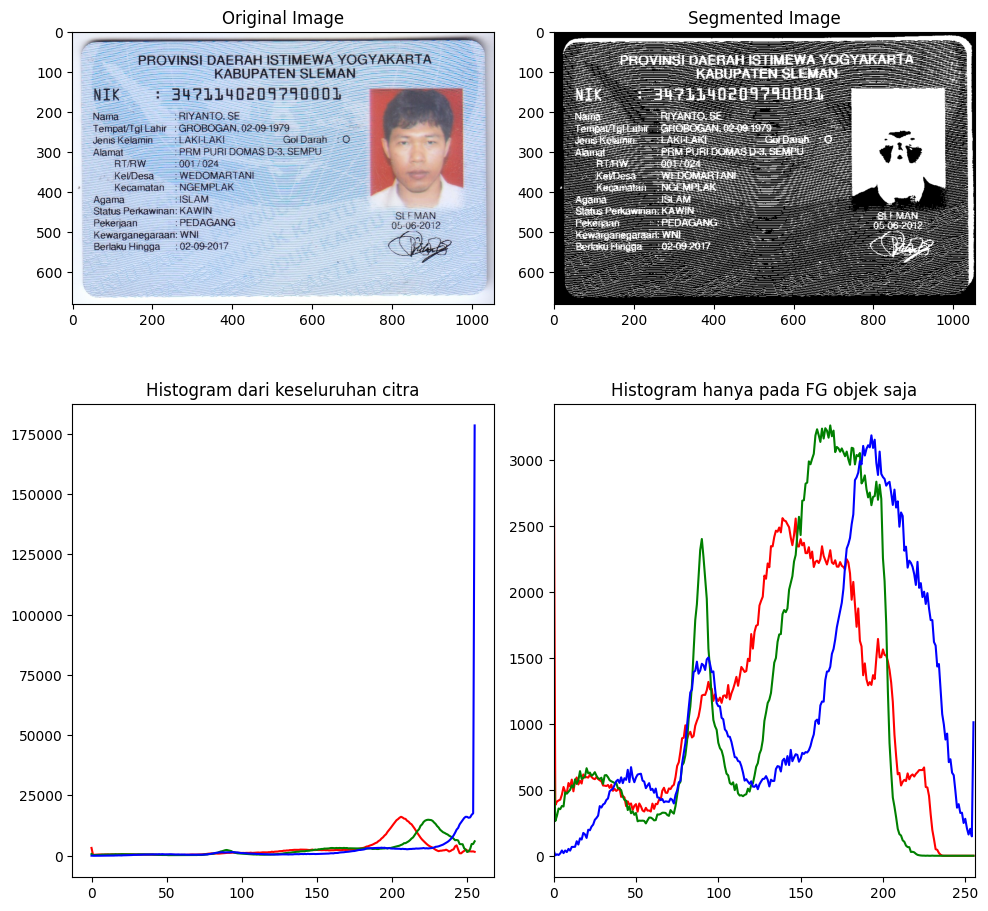

In [34]:
filename = '/content/drive/MyDrive/pcvk-resources/ktp Riyanto.png'

# Convert the image to RGB.
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a mask.
threshold = 200
mask = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY_INV)[1]

# Display the original image, the mask, and the histograms.
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(rgb_image)
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(mask, cmap='gray')
axs[0, 1].set_title('Segmented Image')


for i,col in enumerate(('r','g','b')):
  hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])


plt.tight_layout()
plt.show()

## Nomor 6: Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warnayang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanyawarna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7a6aecbd8520>)

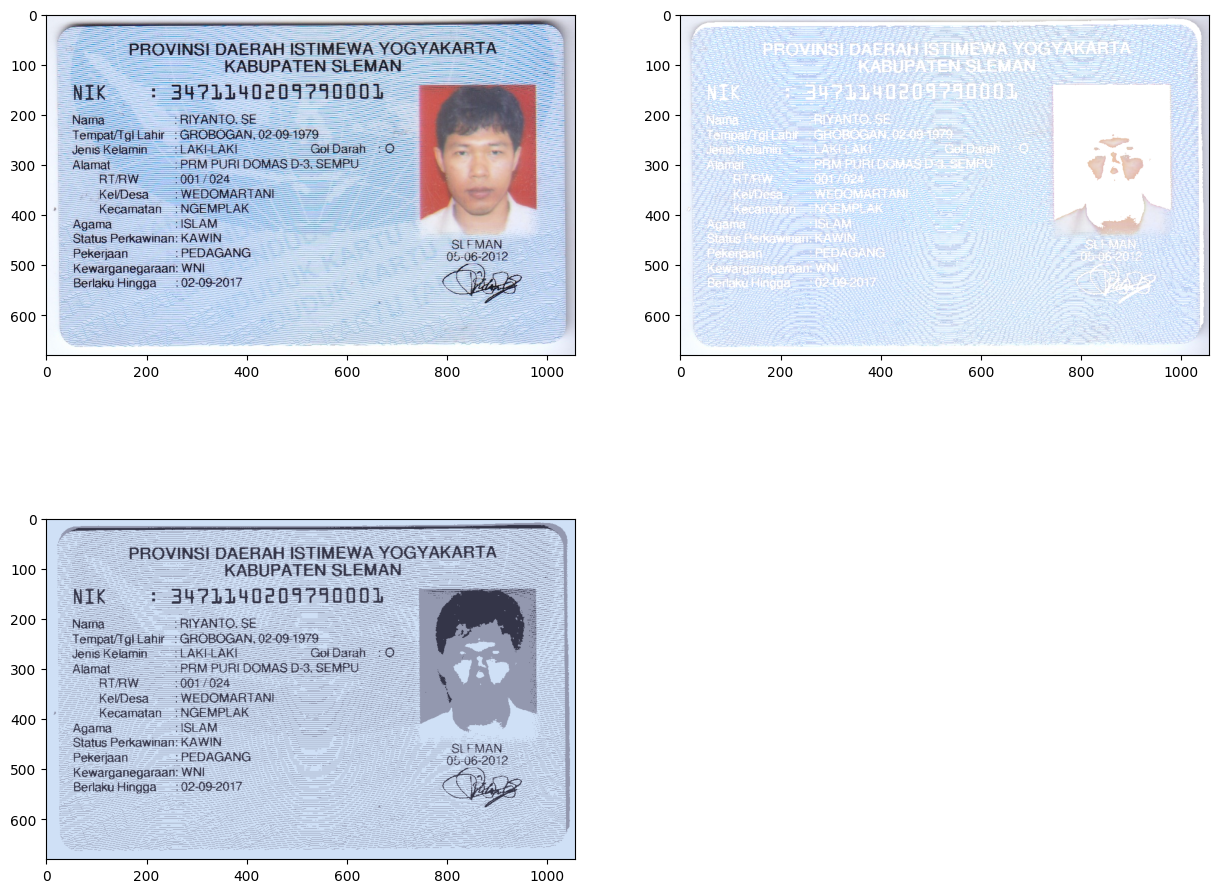

In [41]:
filename = '/content/drive/MyDrive/pcvk-resources/ktp Riyanto.png'

img6 = cv2.imread(filename)
img6 = cv2.cvtColor(img6 ,cv2.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img6.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img6.shape)

# membuat model masked image
masked_image = np.copy(img6)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 2] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img6.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img6)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)
